In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999


import time
import unicodedata

import datetime
from datetime import timedelta, datetime

import csv
import os

import sys
sys.path.append('./lib/')
from functions import *
from tqdm import tnrange, tqdm_notebook
from unidecode import unidecode

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import glob

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

import locale
locale.setlocale(locale.LC_ALL, 'es_ES')

'es_ES'

# Import data

In [3]:
period = '20180210-3'

In [4]:
df = pd.read_csv('../data/output/clean_dates_{}.csv'.format(period),
                 encoding='utf-8', low_memory=False, sep='|', quoting=csv.QUOTE_ALL)

In [5]:
df.shape

(1954998, 27)

# Preliminaries

In [6]:
df.columns

Index(['Unnamed: 0', 'entity', 'department', 'contract', 'year', 'month',
       'group', 'lastn', 'lastn2', 'givenn', 'degree', 'qualif', 'position',
       'region', 'specials', 'currency', 'salary', 'overt', 'start_date',
       'end_date', 'obs', 'url', 'other', 'filename', 'yearmonth', 'datets',
       'pd'],
      dtype='object')

In [15]:
df.head()

,Unnamed: 0,entity,department,contract,year,month,group,lastn,lastn2,givenn,degree,qualif,position,region,specials,currency,salary,overt,start_date,end_date,obs,url,other,filename,yearmonth,datets,pd
0,0,Presidencia de la República,Presidencia de la República,Dotación de planta,año 2017,allyear,AUTORIDAD DE GOBIERNO,bachelet,jeria,veronica michelle,-1,MÉDICO,PRESIDENTA DE LA REPÚBLICA,RM,"2, 4, 8, 9",PESOS,10168106,No,11/03/2014,30/11/-1,-1,http://www.gobiernotransparentechile.cl/direct...,-1,../data/output/scraped_data_20180210-3.csv,2017-allyear,2017-01-01,False
1,1,Presidencia de la República,Presidencia de la República,Dotación de planta,año 2017,allyear,DIRECTIVO,sandoval,navarrete,oscar omar,-1,ABOGADO,"DIRECTOR ADMINISTRATIVO, DIRECCIÓN ADMINISTRATIVA",RM,"5, 7, 8, 9",PESOS,7959883,No,01/04/2014,30/11/-1,FUNCIÓN CRÍTICA = 100%,http://www.gobiernotransparentechile.cl/direct...,-1,../data/output/scraped_data_20180210-3.csv,2017-allyear,2017-01-01,False
2,2,Presidencia de la República,Presidencia de la República,Dotación de planta,año 2017,allyear,DIRECTIVO,vega,sanchez,francisco gabriel,-1,INGENIERO COMERCIAL,"JEFATURA, DEPARTAMENTO DE FINANZAS",RM,"2, 5, 8",PESOS,5399159,No,09/05/2006,30/11/-1,FUNCIÓN CRÍTICA = 50%,http://www.gobiernotransparentechile.cl/direct...,-1,../data/output/scraped_data_20180210-3.csv,2017-allyear,2017-01-01,False
3,3,Presidencia de la República,Presidencia de la República,Dotación de planta,año 2017,allyear,DIRECTIVO,vial,reyes,cecilia berta,-1,INGENIERO COMERCIAL/DOCTORADO EN DESARROLLO EC...,"SUBDIRECTORA ADMINISTRATIVA, SUBDIRECCIÓN ADMI...",RM,"2, 5, 8",PESOS,6452807,No,14/04/2014,30/11/-1,FUNCIÓN CRÍTICA = 100%,http://www.gobiernotransparentechile.cl/direct...,-1,../data/output/scraped_data_20180210-3.csv,2017-allyear,2017-01-01,False
4,4,Presidencia de la República,Presidencia de la República,Dotación de planta,año 2017,allyear,DIRECTIVO,bravo,castillo,hector antonio,-1,LICENCIA DE ENSEÑANZA MEDIA,"JEFATURA, SUBDEPARTAMENTO DE SERVICIOS GENERAL...",RM,1,PESOS,1987835,-1,01/06/1993,30/11/-1,-1,http://www.gobiernotransparentechile.cl/direct...,-1,../data/output/scraped_data_20180210-3.csv,2017-allyear,2017-01-01,False


# Transform

In [9]:
df['datets'] = pd.to_datetime(df['datets'], format='%Y-%m-%d')

In [17]:
df['salary'] = df['salary'].str.replace('.', '')
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')

# Totals over Time 

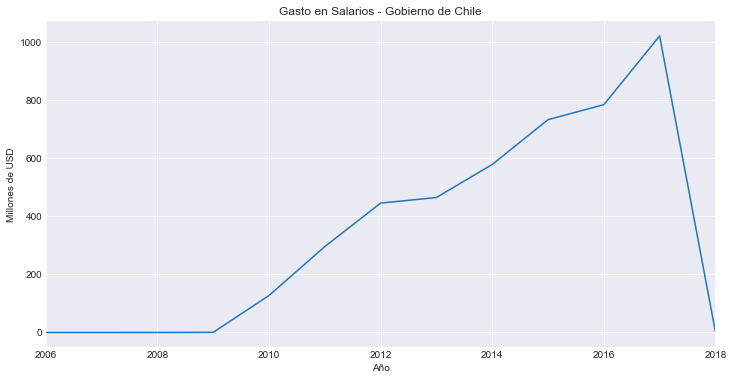

## By Entity

In [32]:
def plotYears(df, col, val):
    a = df.loc[df[col] == val].groupby(pd.Grouper(key='datets', freq='A'))['salary'].sum() / 1e6 / 600

    fig,ax = plt.subplots(figsize = (12,6))
    a.plot(ax=ax)
    ax.set_title('Gasto en Salarios - Gobierno de Chile\n{}'.format(val))
    ax.set_ylabel('Millones de USD')
    ax.set_xlabel('Año')

/Users/jaime/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


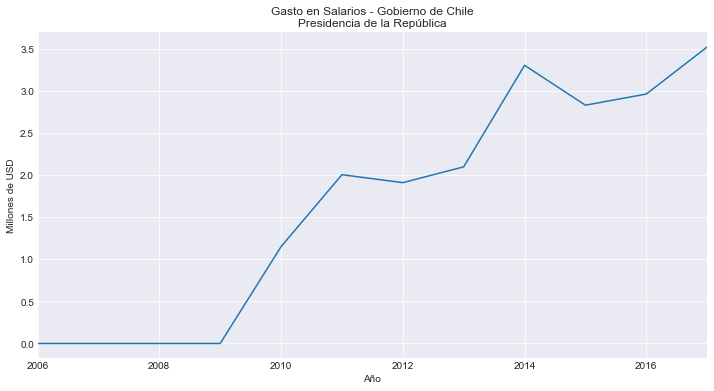

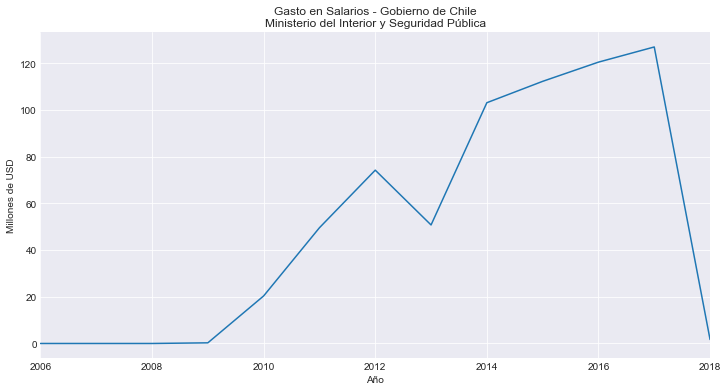

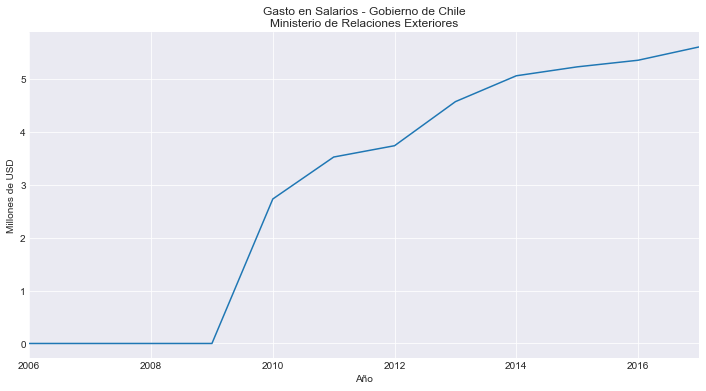

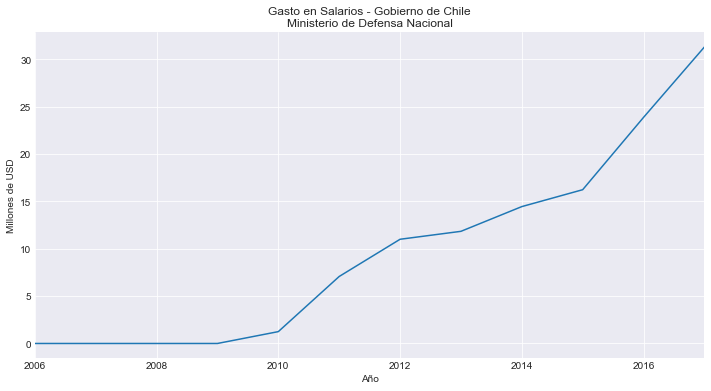

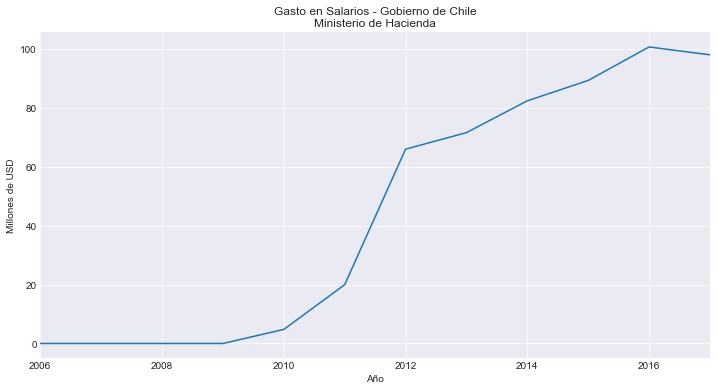

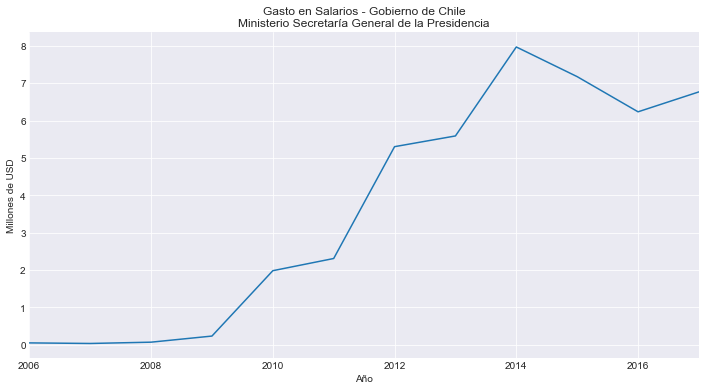

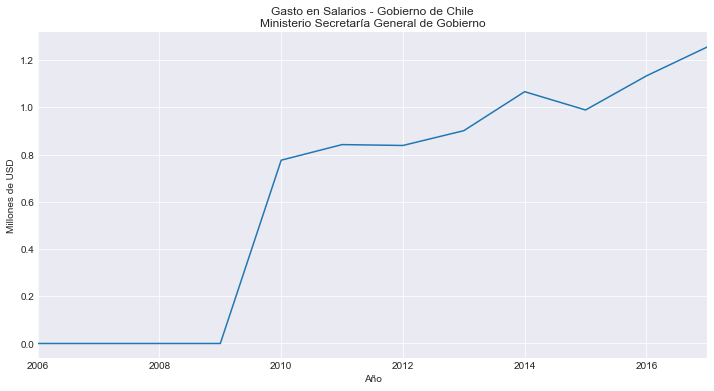

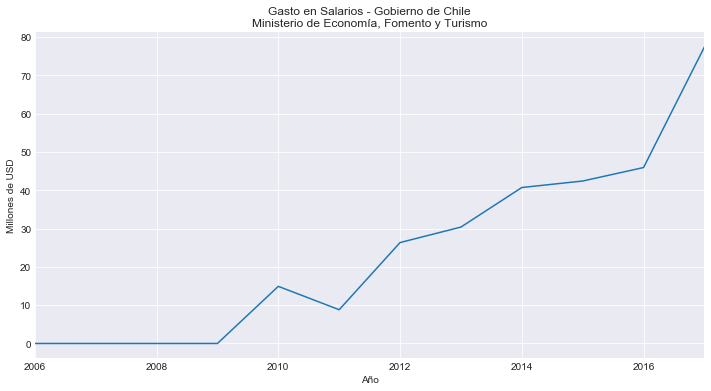

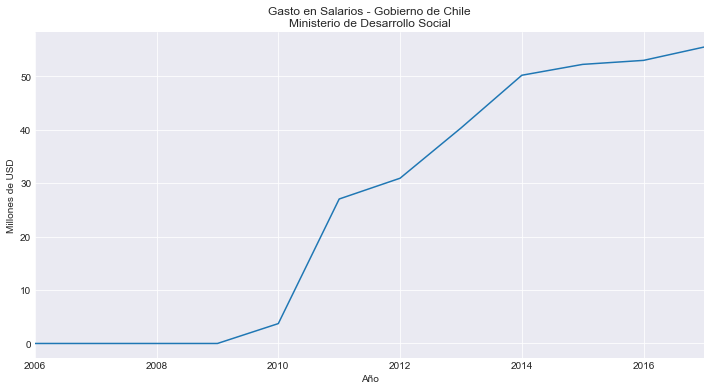

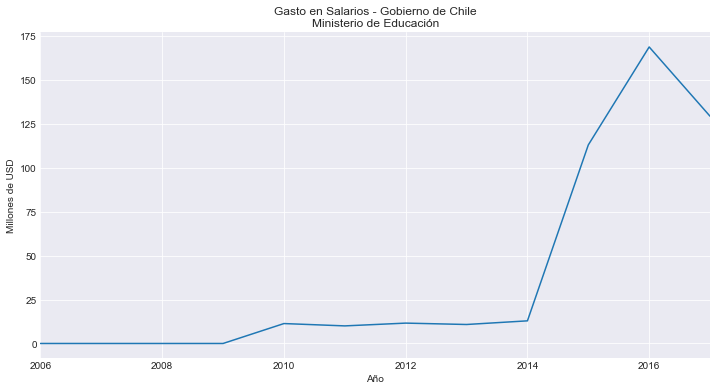

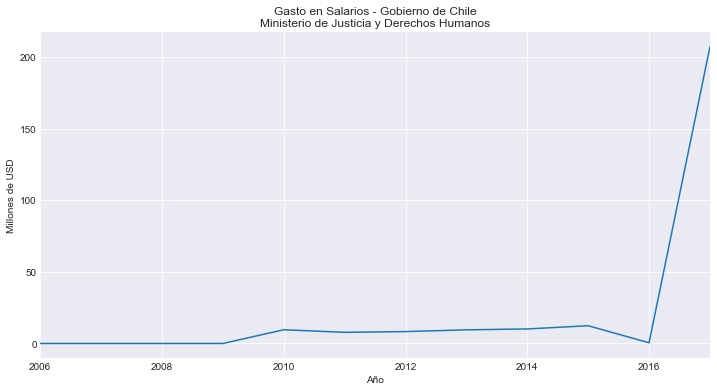

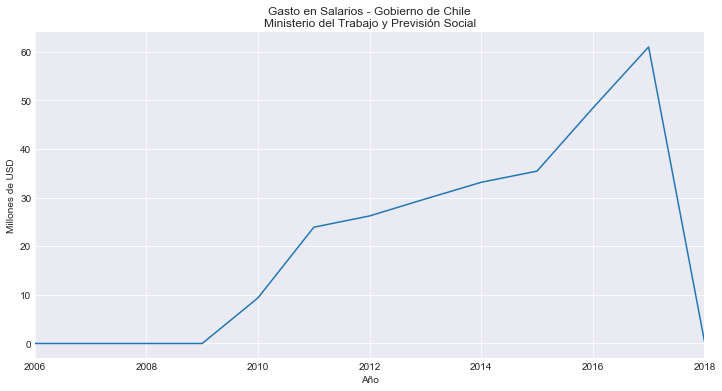

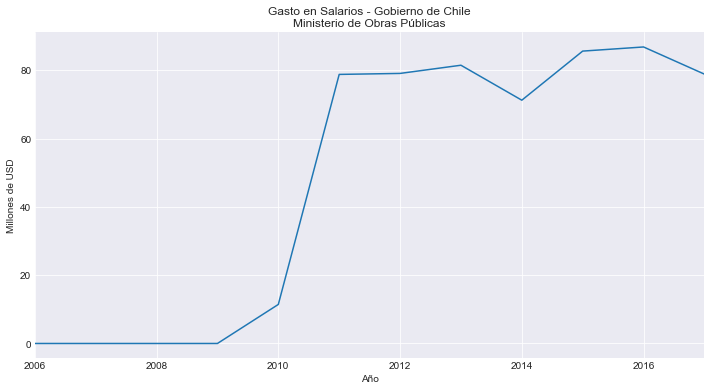

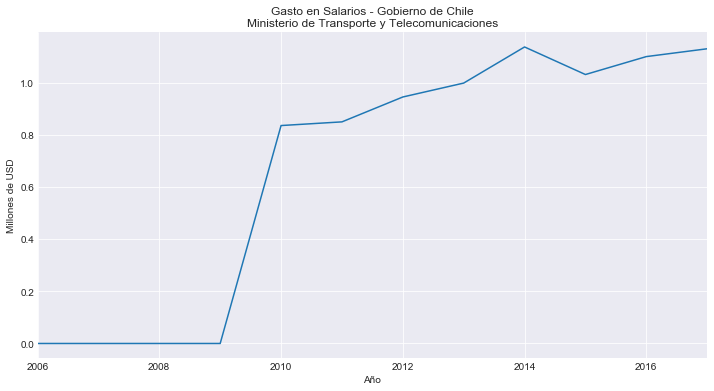

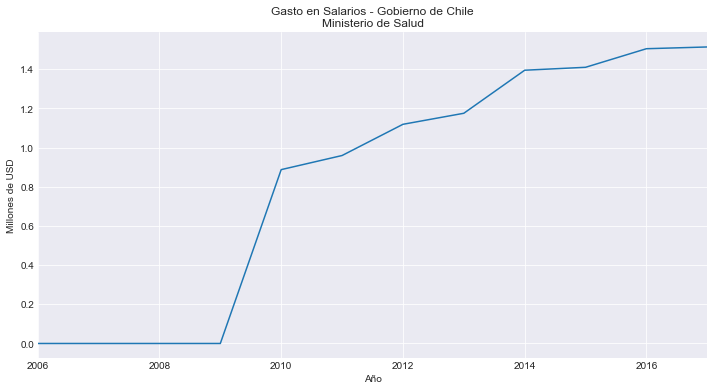

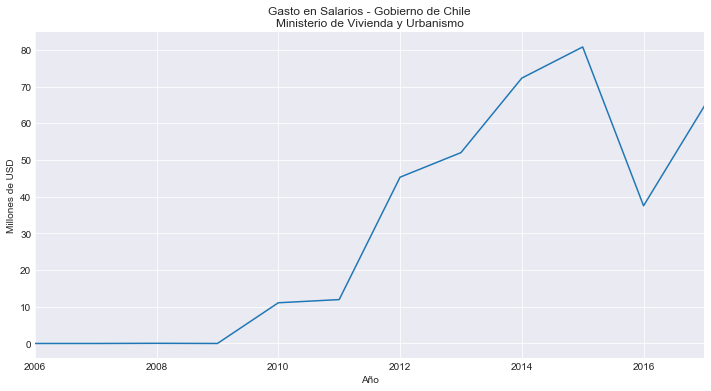

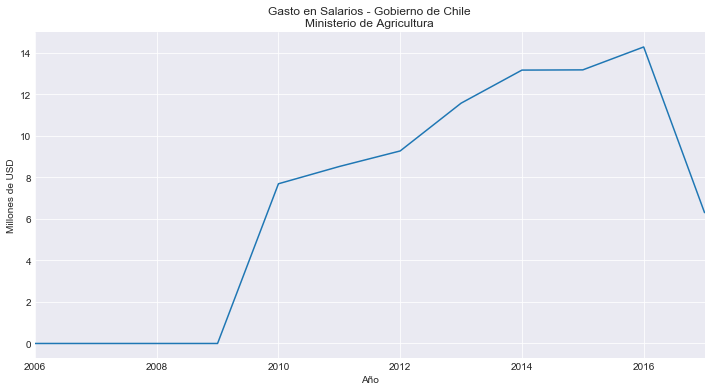

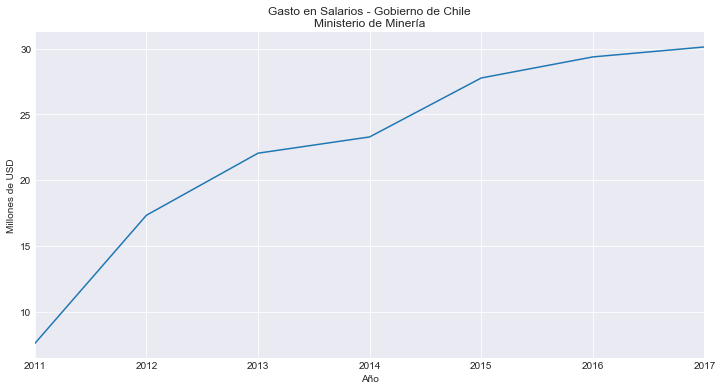

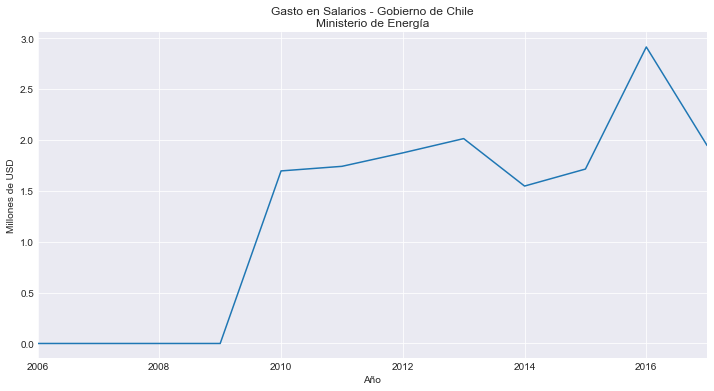

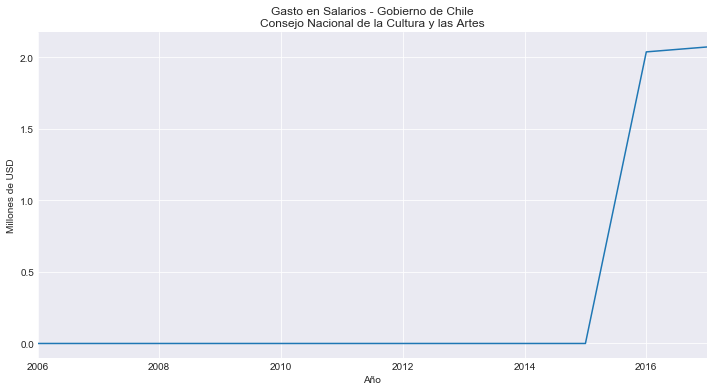

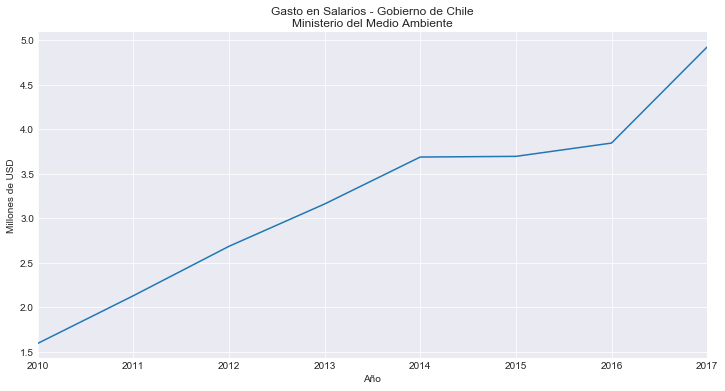

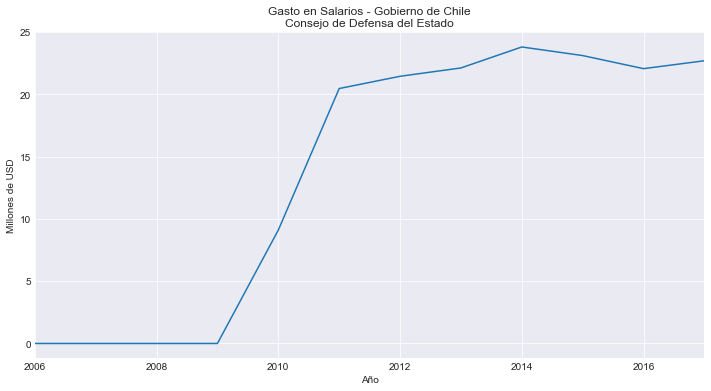

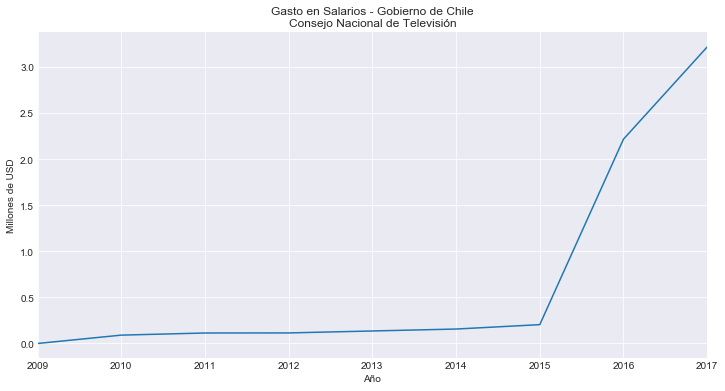

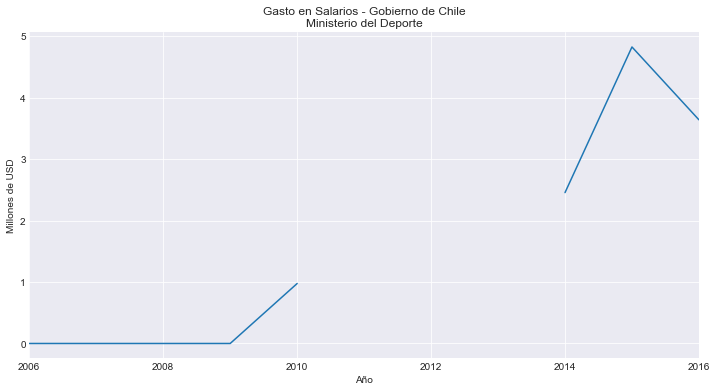

In [33]:
for x in df['entity'].unique():
    plotYears(df, 'entity', x)